## load params and data, create and split Datasets, set checkpoint, init models, set trainer, train, save best model and metric path 

In [1]:
from Load_Train import run_multiple_models, test_trained_models, plot_all_results
import Models

models = [
    Models.EEGClassifier,
    # Models.MNISTNet,
    # Models.EEGNet,

    # Models.TCNModel_withBase,
    # Models.TCNAttentionModel_withBase,
    # Models.EEGTransformerLite_withBase,
    # Models.ESNet,
    ]

shared_parameters = {

    "data_path": "datasets/numpy/ssvep_10_nofilter_GSGG.npz",
    # "data_path": "processed_eeg_data_eyes.npz",
    "OCCIPITAL_SLICE": slice(0, 8),
    "MAX_TIME": "00:00:01:00",
    "SUMMARY": True,    
    "MODEL_KWARGS": {
        "in_channels": 8,
        # "in_channels": 64,
        "num_classes": 11,
        "LR": 1e-4, # 1e-3
        "WEIGHT_DECAY": 0.0,   
    }
}

results, test_loader = run_multiple_models(models, shared_parameters)
# test_results = test_trained_models(results, test_loader)
# plot_all_results(results, test_results)

Loading data from: datasets/numpy/ssvep_10_nofilter_GSGG.npz
Data loaded: X=(1175, 8, 500), y=(1175,)
Dataset split: Train=822, Val=176, Test=177
Dataloaders ready

Training EEGClassifier...



Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name        | Type                      | Params | Mode 
------------------------------------------------------------------
0 | criterion   | CrossEntropyLoss          | 0      | train
1 | train_acc   | MulticlassAccuracy        | 0      | train
2 | val_acc     | MulticlassAccuracy        | 0      | train
3 | test_acc    | MulticlassAccuracy        | 0      | train
4 | test_cm     | MulticlassConfusionMatrix | 0      | train
5 | features    | Sequential                | 213 K  | train
6 | global_pool | AdaptiveAvgPool1d         | 0      | train
7 | classifier  | Sequential                | 34.3 K | train
------------------------------------------------------------------
248 K     Trainable params
0         Non-trainable params
248 K     Total params
0.993     Total estimated model params size (MB)
38        Modules in train m

Training: |          | 0/? [00:00<?, ?it/s]

Error training EEGClassifier: weight tensor should be defined either for all 11 classes or no classes but got weight tensor of shape: [6]

All models processed successfully!



Traceback (most recent call last):
  File "/home/georg/EEG_Classification/Load_Train.py", line 162, in run_multiple_models
    trainer.fit(model, train_loader, val_loader)
  File "/home/georg/anaconda3/envs/pfml/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py", line 560, in fit
    call._call_and_handle_interrupt(
  File "/home/georg/anaconda3/envs/pfml/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py", line 49, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/home/georg/anaconda3/envs/pfml/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py", line 598, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
  File "/home/georg/anaconda3/envs/pfml/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py", line 1011, in _run
    results = self._run_stage()
  File "/home/georg/anaconda3/envs/pfml/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py", line 1055, in _run_stage
    self.fit_loop.

In [ ]:
test_results = test_trained_models(results, test_loader)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing EEGClassifier...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[55  1  0  0  2  0]
 [13  8  0  0  1  0]
 [ 3  0  5  2  2  0]
 [ 6  1  1  4  1  0]
 [ 6  0  0  1  5  0]
 [ 5  1  0  0  1  5]]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


EEGClassifier: Test accuracy = 0.636

Testing MNISTNet...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[54  0  0  2  1  1]
 [ 9 11  0  2  0  0]
 [ 4  0  6  2  0  0]
 [ 3  0  1  9  0  0]
 [ 6  1  0  0  4  1]
 [ 3  2  0  1  0  6]]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


MNISTNet: Test accuracy = 0.698

Testing EEGNet...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[25  6  6  6  7  8]
 [ 5 10  2  2  1  2]
 [ 1  0  7  2  1  1]
 [ 3  1  1  7  1  0]
 [ 3  5  1  0  3  0]
 [ 3  1  1  0  1  6]]
EEGNet: Test accuracy = 0.450

Testing complete for all models.




Plotting EEGClassifier: Test Accuracy = 0.636


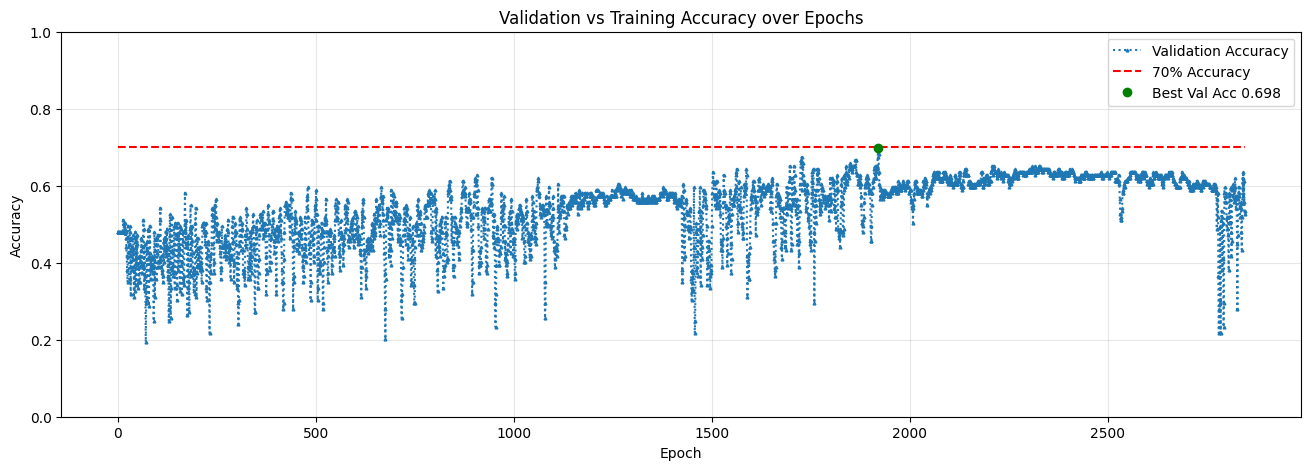


Plotting MNISTNet: Test Accuracy = 0.698


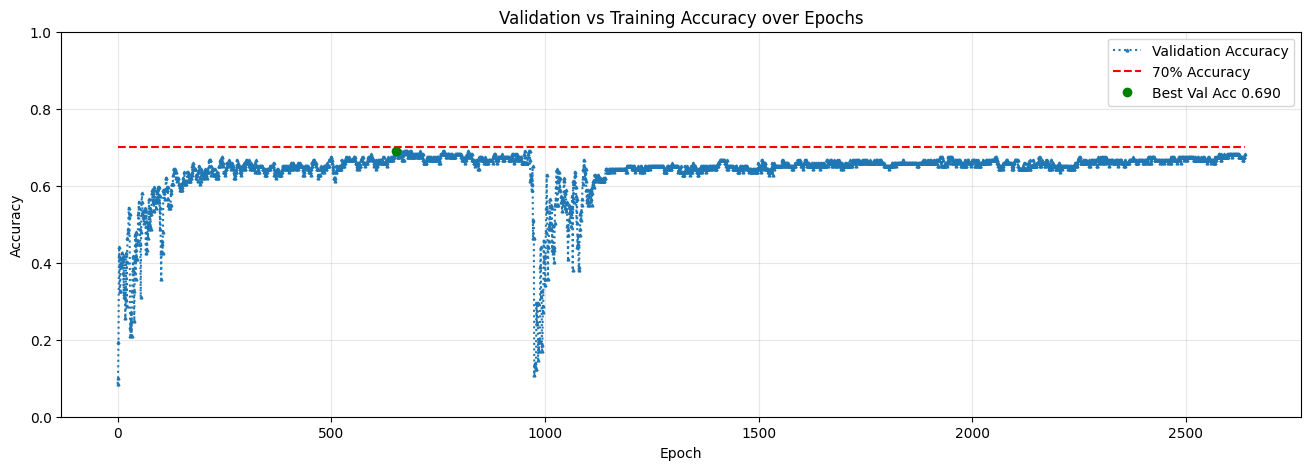


Plotting EEGNet: Test Accuracy = 0.450


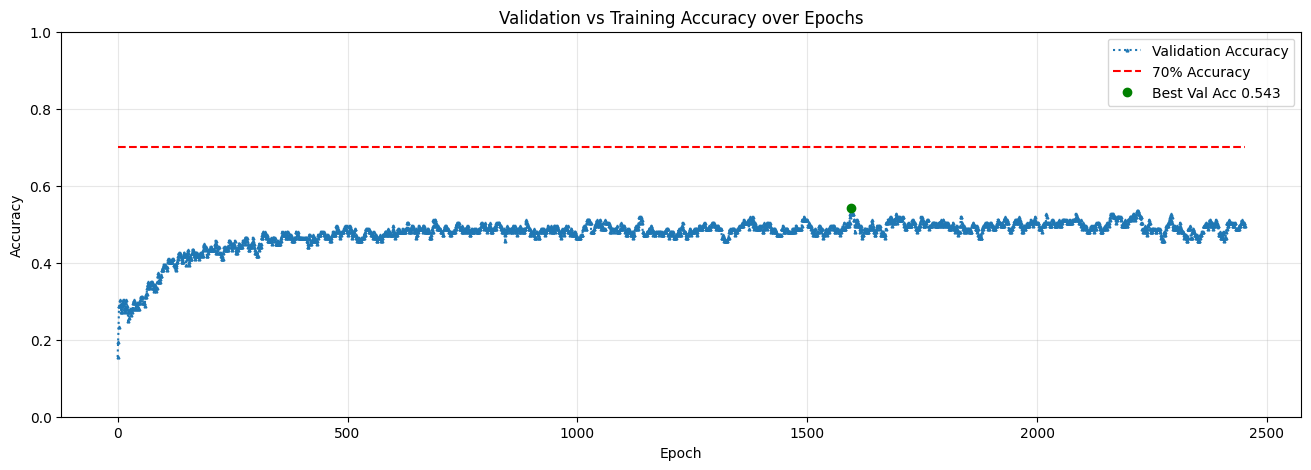

In [3]:
plot_all_results(results, test_results)

## Plot any saved model 

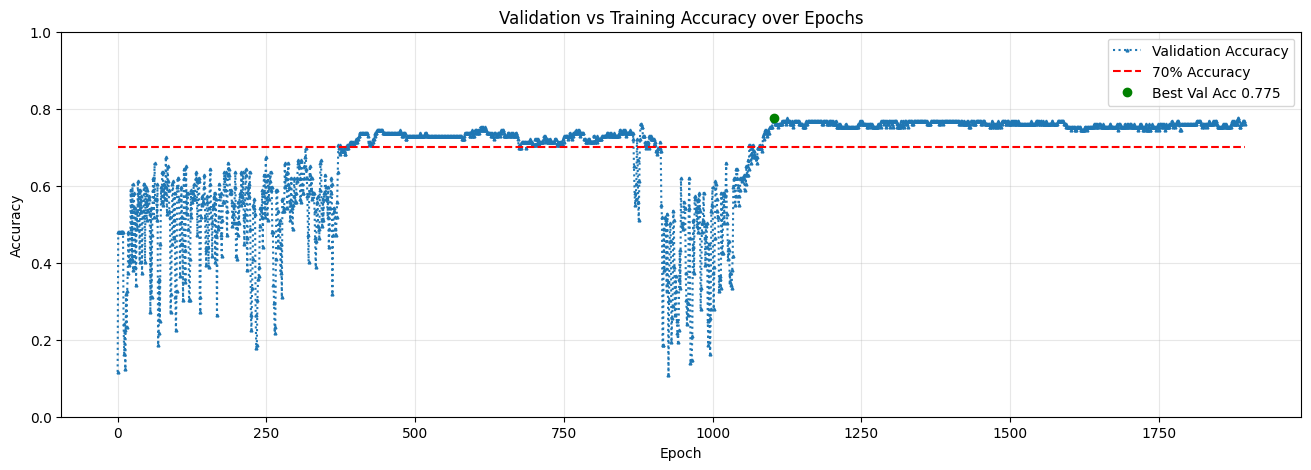

In [2]:
from Utils import plot_training_metrics

csv_path = "logs/EEGClassifier/version__77/metrics.csv"
plot_training_metrics(csv_path)

In [4]:
# results[model_name] = {
#                 "best_model": best_model,
#                 "metrics_path": metrics_path
#             }
from Load_Train import test_trained_models
results = {    
    "model_name": "EEGClassifier",
    "best_model": "logs/EEGClassifier/version__77/checkpoints/best-epoch-1103-val_acc=0.775.ckpt",
    "metrics_path": "logs/EEGClassifier/version__77/metrics.csv",
}
test_results = test_trained_models(results, test_loader)

NameError: name 'test_loader' is not defined